In [219]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import geocoder
import json
import urllib
import urllib.request
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from empyrical_dist import Pmf
from empyrical_dist import Cdf

The Point of this notebook is to look at which attribute is the best predictor for the type of bikes

In [220]:
bikes=pd.read_csv('bikes_full_SF_Feb_ml.csv', error_bad_lines=False)
elevation=pd.read_csv('elevation_sf.csv', error_bad_lines=False)
displacement=pd.read_csv('displacement_sf.csv', error_bad_lines=False)

In [221]:
bikes2=pd.read_csv('bikes_full_SF_Dec.csv', error_bad_lines=False)

In [222]:
elevation.set_index('station_id',inplace=True)
elevation

,SF-M26,SF-M25,SF-M26-2,SF-L27,SF-K26,SF-J27,SF-M30,SF-L27-2,SF-J29-3,SF-J29,...,SF-Z7,SF-Z6,SF-W8,SF-BB17,SF-AA15,SF-Z16,SF-Y14,SF-X14,SF-X19,SF-Y25
station_id,,,,,,,,,,,,,,,,,,,,,
SF-M26,0.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,28.0,19.0,50.0,52.0,59.0,44.0,87.0,90.0,25.0,15.0
SF-M25,-3.0,0.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,...,25.0,16.0,47.0,49.0,56.0,41.0,84.0,87.0,22.0,12.0
SF-M26-2,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-L27,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-K26,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF-Z16,-44.0,-41.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,...,-16.0,-25.0,6.0,8.0,15.0,0.0,43.0,46.0,-19.0,-29.0
SF-Y14,-87.0,-84.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,...,-59.0,-68.0,-37.0,-35.0,-28.0,-43.0,0.0,3.0,-62.0,-72.0
SF-X14,-90.0,-87.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,...,-62.0,-71.0,-40.0,-38.0,-31.0,-46.0,-3.0,0.0,-65.0,-75.0


In [224]:
displacement.set_index('station_id',inplace=True)
displacement

,SF-M26,SF-M25,SF-M26-2,SF-L26,SF-L25,SF-L27,SF-K26,SF-K27-2,SF-K28-3,SF-K27,...,SF-Z7,SF-Z6,SF-W8,SF-BB17,SF-AA15,SF-Z16,SF-Y14,SF-X14,SF-X19,SF-Y25
station_id,,,,,,,,,,,,,,,,,,,,,
SF-M26,0.000000,289.196004,321.927901,242.784438,508.643434,603.029720,505.283657,707.294626,941.506883,773.877616,...,8113.837346,8316.005979,7265.821989,6343.509985,6267.163628,5907.391641,6049.886101,5736.944253,4675.437864,4434.307637
SF-M25,289.196004,0.000000,589.008438,399.743936,340.993201,826.376543,647.062645,880.556552,1158.841316,936.482738,...,7892.483542,8087.661163,7026.834015,6218.587808,6109.034956,5756.635503,5865.069475,5551.109576,4544.641873,4449.245221
SF-M26-2,321.927901,589.008438,0.000000,257.528747,685.795051,308.345915,348.977147,462.667466,637.845391,534.763958,...,8432.421444,8636.079798,7587.418871,6617.985441,6560.856532,6197.379125,6356.423248,6044.047598,4955.377990,4603.118793
SF-L26,242.784438,399.743936,257.528747,0.000000,429.045678,429.031456,267.934475,488.153462,759.150763,549.471156,...,8291.451897,8487.289906,7426.314298,6572.547467,6484.015307,6127.273573,6253.227899,5939.639317,4902.226444,4674.773255
SF-L25,508.643434,340.993201,685.795051,429.045678,0.000000,807.082219,552.602521,781.605935,1096.528150,816.532980,...,8033.896070,8216.741272,7137.239927,6476.991178,6336.383048,5992.087254,6062.382709,5747.797188,4801.109833,4782.694438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF-Z16,5907.391641,5756.635503,6197.379125,6127.273573,5992.087254,6502.314185,6392.803464,6612.547962,6835.063480,6676.353255,...,3090.423870,3436.320368,3019.476289,761.708484,399.574322,0.000000,862.575956,877.261288,1289.187176,3314.219829
SF-Y14,6049.886101,5865.069475,6356.423248,6253.227899,6062.382709,6652.671087,6511.505935,6741.239097,6990.663000,6800.247310,...,2387.187477,2706.696500,2171.195741,1539.074606,733.585449,862.575956,0.000000,314.633656,1785.556300,4039.362900
SF-X14,5736.944253,5551.109576,6044.047598,5939.639317,5747.797188,6339.812260,6197.642642,6427.599533,6677.903445,6486.456537,...,2632.022104,2936.160356,2298.472942,1622.008738,890.478356,877.261288,314.633656,0.000000,1556.509683,3857.806520


In [155]:
elevation.loc['SF-M25']['SF-M30']

-11.0

In [225]:
bikes['displacement']=0
bikes2['displacement']=0

In [226]:
bikes['started_at']=pd.to_datetime(bikes['started_at'],errors='coerce')
bikes['ended_at']=pd.to_datetime(bikes['ended_at'],errors='coerce')
bikes['start_hour']=bikes['started_at'].dt.hour
bikes['end_hour']=bikes['ended_at'].dt.hour
bikes


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,0,400.0,2951.224312,19,19
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,0,1522.0,1995.429149,10,11
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,0,418.0,1769.467733,13,13
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,0,1513.0,841.913402,18,18
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,0,337.0,2845.038145,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,0,1209.0,2891.959774,6,6
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,0,923.0,3788.059986,6,6
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,0,974.0,3589.711876,6,6
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,0,1055.0,3314.103665,6,6


In [227]:
bikes2['started_at']=pd.to_datetime(bikes2['started_at'],errors='coerce')
bikes2['ended_at']=pd.to_datetime(bikes2['ended_at'],errors='coerce')
bikes2['start_hour']=bikes2['started_at'].dt.hour
bikes2['end_hour']=bikes2['ended_at'].dt.hour
bikes2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour
0,4FADA87DD3385495,classic_bike,2020-12-29 10:41:22,2020-12-29 10:52:06,Brannan St at 4th St,SF-J28-2,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.777934,-122.396973,37.771330,-122.386622,member,0,644.0,1.816736,10,10
1,53A71534B56CBE17,electric_bike,2020-12-05 15:19:00,2020-12-05 15:29:58,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773553,-122.411948,37.787513,-122.388115,member,0,658.0,3.965704,15,15
2,41B49C14E24C9743,electric_bike,2020-12-09 13:48:20,2020-12-09 13:59:31,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773472,-122.411851,37.787387,-122.388128,member,0,671.0,3.872719,13,13
3,FF985AAA8BF28825,electric_bike,2020-12-12 12:59:20,2020-12-12 13:02:16,Market St at Franklin St,SF-K22-1,Market St at Dolores St,SF-L21,37.773868,-122.421086,37.769303,-122.426712,member,0,176.0,4.027842,12,13
4,B4DF745803BA3516,electric_bike,2020-12-01 18:10:27,2020-12-01 18:22:38,Mississippi St at 17th St,SF-N29,22nd St at Dolores St,SF-Q21-1,37.764834,-122.394894,37.755012,-122.425855,member,0,731.0,4.019079,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,37.740510,-122.376471,casual,0,562.0,5.689256,7,7
68979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,37.740531,-122.376482,casual,0,683.0,4.672513,7,7
68980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,37.740469,-122.376532,casual,0,585.0,5.463121,7,7
68981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,37.740519,-122.376478,casual,0,678.0,4.745817,7,7


In [228]:
bikes=bikes[bikes['rideable_type']!='docked_bike']
bikes2=bikes2[bikes2['rideable_type']!='docked_bike']

In [229]:
bikes2['rideable_type'].describe()

count             68706
unique                2
top       electric_bike
freq              42534
Name: rideable_type, dtype: object

In [230]:
elevation.loc['SF-M26']['SF-M25']

3.0

In [231]:
bikes['ele_diff']=0
for index,row in bikes.iterrows():
    try:
        bikes.loc[index,'ele_diff']=elevation.loc[row['start_station_id']][row['end_station_id']]
        bikes.loc[index,'displacement']=displacement.loc[row['start_station_id']][row['end_station_id']]
        #print(bikes.loc[index,'ele_diff'])
    except KeyError:
        pass

bikes

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1180.489725,400.0,2951.224312,19,19,7.0
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3037.043165,1522.0,1995.429149,10,11,8.0
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,739.637513,418.0,1769.467733,13,13,6.0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1273.814978,1513.0,841.913402,18,18,8.0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,958.777855,337.0,2845.038145,13,13,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1209.0,2891.959774,6,6,-71.0
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,923.0,3788.059986,6,6,-71.0
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,974.0,3589.711876,6,6,-71.0
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1055.0,3314.103665,6,6,-71.0


In [232]:
#bikes=bikes.dropna
bikes=bikes.dropna()
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1180.489725,400.0,2951.224312,19,19,7.0
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3037.043165,1522.0,1995.429149,10,11,8.0
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,739.637513,418.0,1769.467733,13,13,6.0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1273.814978,1513.0,841.913402,18,18,8.0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,958.777855,337.0,2845.038145,13,13,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1209.0,2891.959774,6,6,-71.0
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,923.0,3788.059986,6,6,-71.0
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,974.0,3589.711876,6,6,-71.0
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1055.0,3314.103665,6,6,-71.0


In [233]:
bikes2['ele_diff']=0
for index,row in bikes2.iterrows():
    try:
        bikes2.loc[index,'ele_diff']=elevation.loc[row['start_station_id']][row['end_station_id']]
        bikes2.loc[index,'displacement']=displacement.loc[row['start_station_id']][row['end_station_id']]

    except KeyError:
        pass

bikes2

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff
0,4FADA87DD3385495,classic_bike,2020-12-29 10:41:22,2020-12-29 10:52:06,Brannan St at 4th St,SF-J28-2,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.777934,-122.396973,37.771330,-122.386622,member,1155.371871,644.0,1.816736,10,10,0.0
1,53A71534B56CBE17,electric_bike,2020-12-05 15:19:00,2020-12-05 15:29:58,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773553,-122.411948,37.787513,-122.388115,member,2576.305822,658.0,3.965704,15,15,-7.0
2,41B49C14E24C9743,electric_bike,2020-12-09 13:48:20,2020-12-09 13:59:31,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773472,-122.411851,37.787387,-122.388128,member,2576.305822,671.0,3.872719,13,13,-7.0
3,FF985AAA8BF28825,electric_bike,2020-12-12 12:59:20,2020-12-12 13:02:16,Market St at Franklin St,SF-K22-1,Market St at Dolores St,SF-L21,37.773868,-122.421086,37.769303,-122.426712,member,722.012681,176.0,4.027842,12,13,18.0
4,B4DF745803BA3516,electric_bike,2020-12-01 18:10:27,2020-12-01 18:22:38,Mississippi St at 17th St,SF-N29,22nd St at Dolores St,SF-Q21-1,37.764834,-122.394894,37.755012,-122.425855,member,2941.391846,731.0,4.019079,18,18,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,37.740510,-122.376471,casual,3208.936062,562.0,5.689256,7,7,0.0
68979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,37.740531,-122.376482,casual,3208.936062,683.0,4.672513,7,7,0.0
68980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,37.740469,-122.376532,casual,3208.936062,585.0,5.463121,7,7,0.0
68981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,37.740519,-122.376478,casual,3208.936062,678.0,4.745817,7,7,0.0


In [234]:
bikes2=bikes2.dropna()
bikes2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff
0,4FADA87DD3385495,classic_bike,2020-12-29 10:41:22,2020-12-29 10:52:06,Brannan St at 4th St,SF-J28-2,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.777934,-122.396973,37.771330,-122.386622,member,1155.371871,644.0,1.816736,10,10,0.0
1,53A71534B56CBE17,electric_bike,2020-12-05 15:19:00,2020-12-05 15:29:58,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773553,-122.411948,37.787513,-122.388115,member,2576.305822,658.0,3.965704,15,15,-7.0
2,41B49C14E24C9743,electric_bike,2020-12-09 13:48:20,2020-12-09 13:59:31,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773472,-122.411851,37.787387,-122.388128,member,2576.305822,671.0,3.872719,13,13,-7.0
3,FF985AAA8BF28825,electric_bike,2020-12-12 12:59:20,2020-12-12 13:02:16,Market St at Franklin St,SF-K22-1,Market St at Dolores St,SF-L21,37.773868,-122.421086,37.769303,-122.426712,member,722.012681,176.0,4.027842,12,13,18.0
4,B4DF745803BA3516,electric_bike,2020-12-01 18:10:27,2020-12-01 18:22:38,Mississippi St at 17th St,SF-N29,22nd St at Dolores St,SF-Q21-1,37.764834,-122.394894,37.755012,-122.425855,member,2941.391846,731.0,4.019079,18,18,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,37.740510,-122.376471,casual,3208.936062,562.0,5.689256,7,7,0.0
68979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,37.740531,-122.376482,casual,3208.936062,683.0,4.672513,7,7,0.0
68980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,37.740469,-122.376532,casual,3208.936062,585.0,5.463121,7,7,0.0
68981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,37.740519,-122.376478,casual,3208.936062,678.0,4.745817,7,7,0.0


In [235]:
bikes['type_num']=0
bikes['type_num']=[1 if x=='classic_bike' else 0 for x in bikes['rideable_type']]
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff,type_num
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1180.489725,400.0,2951.224312,19,19,7.0,1
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3037.043165,1522.0,1995.429149,10,11,8.0,1
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,739.637513,418.0,1769.467733,13,13,6.0,0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1273.814978,1513.0,841.913402,18,18,8.0,0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,958.777855,337.0,2845.038145,13,13,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1209.0,2891.959774,6,6,-71.0,1
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,923.0,3788.059986,6,6,-71.0,1
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,974.0,3589.711876,6,6,-71.0,1
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3496.379367,1055.0,3314.103665,6,6,-71.0,1


In [236]:
bikes2['type_num']=0
bikes2['type_num']=[1 if x=='classic_bike' else 0 for x in bikes2['rideable_type']]
bikes2

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff,type_num
0,4FADA87DD3385495,classic_bike,2020-12-29 10:41:22,2020-12-29 10:52:06,Brannan St at 4th St,SF-J28-2,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.777934,-122.396973,37.771330,-122.386622,member,1155.371871,644.0,1.816736,10,10,0.0,1
1,53A71534B56CBE17,electric_bike,2020-12-05 15:19:00,2020-12-05 15:29:58,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773553,-122.411948,37.787513,-122.388115,member,2576.305822,658.0,3.965704,15,15,-7.0,0
2,41B49C14E24C9743,electric_bike,2020-12-09 13:48:20,2020-12-09 13:59:31,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773472,-122.411851,37.787387,-122.388128,member,2576.305822,671.0,3.872719,13,13,-7.0,0
3,FF985AAA8BF28825,electric_bike,2020-12-12 12:59:20,2020-12-12 13:02:16,Market St at Franklin St,SF-K22-1,Market St at Dolores St,SF-L21,37.773868,-122.421086,37.769303,-122.426712,member,722.012681,176.0,4.027842,12,13,18.0,0
4,B4DF745803BA3516,electric_bike,2020-12-01 18:10:27,2020-12-01 18:22:38,Mississippi St at 17th St,SF-N29,22nd St at Dolores St,SF-Q21-1,37.764834,-122.394894,37.755012,-122.425855,member,2941.391846,731.0,4.019079,18,18,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,37.740510,-122.376471,casual,3208.936062,562.0,5.689256,7,7,0.0,0
68979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,37.740531,-122.376482,casual,3208.936062,683.0,4.672513,7,7,0.0,0
68980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,37.740469,-122.376532,casual,3208.936062,585.0,5.463121,7,7,0.0,0
68981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,37.740519,-122.376478,casual,3208.936062,678.0,4.745817,7,7,0.0,0


Create a Column for quantifiable predction, if bike is classic then 1 else 0

In [72]:
bikes['ele_diff'].min()

-108.0

In [17]:
bikes2['ele_diff'].describe()

count    58635.000000
mean        -1.651317
std         23.587893
min       -108.000000
25%        -10.000000
50%          0.000000
75%          7.000000
max        107.000000
Name: ele_diff, dtype: float64

In [237]:
l=list(range(-100,80))

In [238]:
score_reg=pd.DataFrame(index=l,columns=['elevation','dispalcement','duration'])
score_reg2=score_reg

In [239]:
score_reg2

,elevation,dispalcement,duration
-100,NaN,NaN,NaN
-99,NaN,NaN,NaN
-98,NaN,NaN,NaN
-97,NaN,NaN,NaN
-96,NaN,NaN,NaN
...,...,...,...
75,NaN,NaN,NaN
76,NaN,NaN,NaN
77,NaN,NaN,NaN
78,NaN,NaN,NaN


In [267]:
bikes=bikes[bikes['displacement']>0]
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff,type_num,elevation_class
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,...,-122.394796,member,1180.489725,400.0,2951.224312,19,19,7.0,1,0 to 9
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,...,-122.396434,member,3037.043165,1522.0,1995.429149,10,11,8.0,1,0 to 9
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,...,-122.410662,member,739.637513,418.0,1769.467733,13,13,6.0,0,0 to 9
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,...,-122.419883,member,1273.814978,1513.0,841.913402,18,18,8.0,0,0 to 9
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,...,-122.420129,member,958.777855,337.0,2845.038145,13,13,2.0,1,0 to 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,-122.415400,member,3496.379367,1209.0,2891.959774,6,6,-71.0,1,-108 to -11
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,-122.415400,member,3496.379367,923.0,3788.059986,6,6,-71.0,1,-108 to -11
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,-122.415400,member,3496.379367,974.0,3589.711876,6,6,-71.0,1,-108 to -11
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,-122.415400,member,3496.379367,1055.0,3314.103665,6,6,-71.0,1,-108 to -11


In [268]:
for i in range(-100,80):
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['ele_diff'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg.loc[i]['elevation']=score
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['displacement'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg.loc[i]['dispalcement']=score
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['duration'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg.loc[i]['duration']=score
    

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


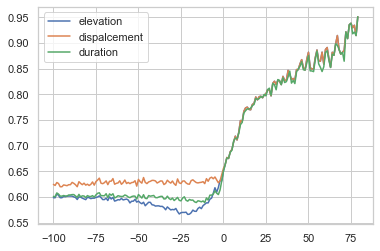

In [269]:
lines=score_reg.plot.line()

In [270]:
score_reg2=pd.DataFrame(index=l,columns=['elevation','dispalcement','duration'])
score_reg2

,elevation,dispalcement,duration
-100,NaN,NaN,NaN
-99,NaN,NaN,NaN
-98,NaN,NaN,NaN
-97,NaN,NaN,NaN
-96,NaN,NaN,NaN
...,...,...,...
75,NaN,NaN,NaN
76,NaN,NaN,NaN
77,NaN,NaN,NaN
78,NaN,NaN,NaN


In [272]:
bikes2=bikes2[bikes2['displacement']>0]
bikes2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff,type_num,elevation_class
0,4FADA87DD3385495,classic_bike,2020-12-29 10:41:22,2020-12-29 10:52:06,Brannan St at 4th St,SF-J28-2,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.777934,-122.396973,...,-122.386622,member,1155.371871,644.0,1.816736,10,10,0.0,1,-11 to 0
1,53A71534B56CBE17,electric_bike,2020-12-05 15:19:00,2020-12-05 15:29:58,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773553,-122.411948,...,-122.388115,member,2576.305822,658.0,3.965704,15,15,-7.0,0,-11 to 0
2,41B49C14E24C9743,electric_bike,2020-12-09 13:48:20,2020-12-09 13:59:31,Folsom St at 9th St,SF-K25,The Embarcadero at Bryant St,SF-G30-2,37.773472,-122.411851,...,-122.388128,member,2576.305822,671.0,3.872719,13,13,-7.0,0,-11 to 0
3,FF985AAA8BF28825,electric_bike,2020-12-12 12:59:20,2020-12-12 13:02:16,Market St at Franklin St,SF-K22-1,Market St at Dolores St,SF-L21,37.773868,-122.421086,...,-122.426712,member,722.012681,176.0,4.027842,12,13,18.0,0,9 to 107
4,B4DF745803BA3516,electric_bike,2020-12-01 18:10:27,2020-12-01 18:22:38,Mississippi St at 17th St,SF-N29,22nd St at Dolores St,SF-Q21-1,37.764834,-122.394894,...,-122.425855,member,2941.391846,731.0,4.019079,18,18,30.0,0,9 to 107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,...,-122.376471,casual,3208.936062,562.0,5.689256,7,7,0.0,0,-11 to 0
68979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,...,-122.376482,casual,3208.936062,683.0,4.672513,7,7,0.0,0,-11 to 0
68980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,...,-122.376532,casual,3208.936062,585.0,5.463121,7,7,0.0,0,-11 to 0
68981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,...,-122.376478,casual,3208.936062,678.0,4.745817,7,7,0.0,0,-11 to 0


In [273]:
for i in range(-100,80):
    X=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['ele_diff'])
    Y=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
   # print(np.any(np.isnan(X_scale)))
    #print(np.any(np.isnan(X_scale)))
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg2.loc[i]['elevation']=score
    X=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['displacement'])
    Y=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg2.loc[i]['dispalcement']=score
    X=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['duration'])
    Y=pd.DataFrame(bikes2[bikes2['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg2.loc[i]['duration']=score
    

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

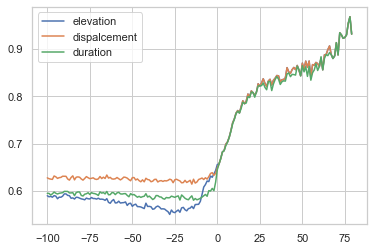

In [274]:
lines=score_reg2.plot.line()

In [279]:
bikes2.ele_diff.describe()

count    49520.000000
mean        -1.955271
std         25.655589
min       -108.000000
25%        -13.000000
50%         -1.000000
75%         10.000000
max        107.000000
Name: ele_diff, dtype: float64

In [285]:
bikes['elevation_class']=pd.cut(bikes.ele_diff,
                     bins=[-108, -13, -1, 9, 107],
                     labels=['-108 to -13', '-13 to -1','-1 to 9', '9 to 107'])


C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [286]:
len(bikes[bikes['elevation_class']=='9 to 107'])

14025

<AxesSubplot:xlabel='elevation_class'>

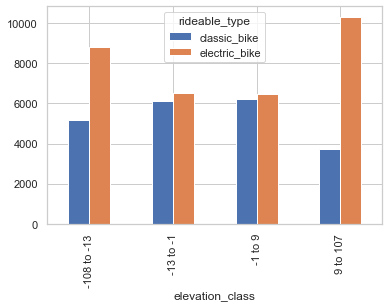

In [287]:
bikes_class=bikes.groupby(['elevation_class','rideable_type']).size().unstack(level=1)
bikes_class.plot(kind='bar')

<AxesSubplot:>

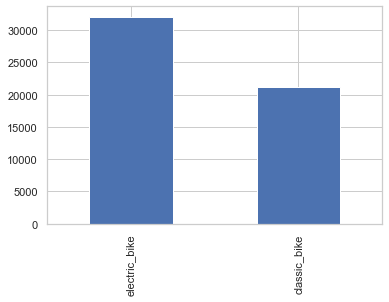

In [288]:
bikes['rideable_type'].value_counts().plot(kind='bar')

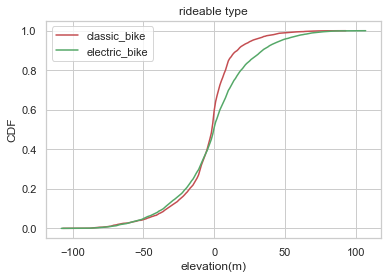

In [358]:
def decorate_cdf(title, x, y):
    """Labels the axes.

    title: string
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend(bikes[bikes['rideable_type']!='docked_type'].groupby('rideable_type').groups.keys())
colors=['r', 'g']
i=0
for name, group in bikes.groupby('rideable_type'):
    Cdf.from_seq(group.ele_diff).plot(color=colors[i])
    i=i+1

title, x, y = 'rideable type','elevation(m)', 'CDF'
decorate_cdf(title,x,y)

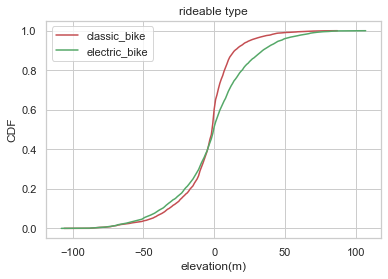

In [359]:
def decorate_cdf(title, x, y):
    """Labels the axes.

    title: string
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend(bikes2[bikes2['rideable_type']!='docked_type'].groupby('rideable_type').groups.keys())
colors=['r', 'g']
i=0
for name, group in bikes2.groupby('rideable_type'):
    Cdf.from_seq(group.ele_diff).plot(color=colors[i])
    i=i+1

title, x, y = 'rideable type','elevation(m)', 'CDF'
decorate_cdf(title,x,y)

In [290]:
bikes2['elevation_class']=pd.cut(bikes2.ele_diff,
                     bins=[-108, -13, -1, 9, 107],
                     labels=['-108 to -13', '-13 to -1','-1 to 9', '9 to 107'])

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='elevation_class'>

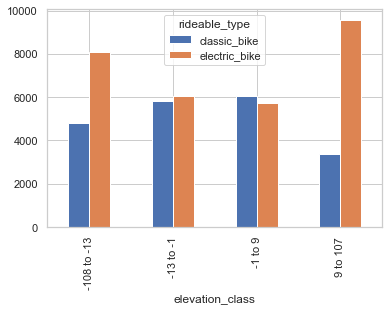

In [291]:
bikes2_class=bikes2.groupby(['elevation_class','rideable_type']).size().unstack(level=1)
bikes2_class.plot(kind='bar')

<AxesSubplot:>

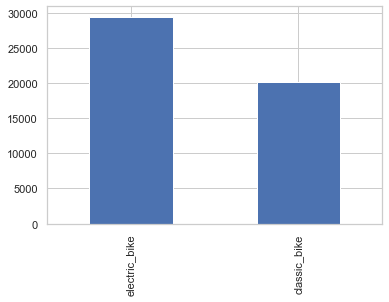

In [292]:
bikes2['rideable_type'].value_counts().plot(kind='bar')

In [293]:
bikes3=pd.read_csv('bikes_full_DC_Feb.csv', error_bad_lines=False)
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252.0,New York Ave & 15th St NW,31222.0,38.901539,-77.046564,38.899032,-77.033354,casual,1179.238631,652.0,1.808648
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252.0,25th St & Pennsylvania Ave NW,31237.0,38.901539,-77.046564,38.903827,-77.053485,casual,651.881747,552.0,1.180945
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014.0,23rd & E St NW,31260.0,38.897315,-77.070993,38.896104,-77.049882,casual,1836.353538,1202.0,1.527748
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043.0,Royal St & Wilkes St,31903.0,38.810741,-77.044633,38.799267,-77.044700,casual,1273.815588,363.0,3.509134
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047.0,Crystal Dr & 20th St S,31002.0,38.814577,-77.052808,38.856425,-77.049232,casual,4656.008896,1264.0,3.683551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662.0,20th & E St NW,31204.0,38.902386,-77.005649,38.896300,-77.045000,member,3479.877798,1409.0,2.469750
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656.0,20th & E St NW,31204.0,38.901953,-76.978679,38.896287,-77.044961,member,5784.256660,1564.0,3.698374
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656.0,20th & E St NW,31204.0,38.901973,-76.978606,38.896269,-77.044956,casual,5790.518645,1539.0,3.762520
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.876697,-77.017898,38.888774,-77.028694,member,1635.572203,889.0,1.839789


In [294]:
elevation2=pd.read_csv('elevation_dc.csv')
elevation2.set_index('station_id',inplace=True)

In [295]:
elevation2

,31267,31298,31250,31224,31221,31285,31213,31212,31239,31257,...,31823,31813,31818,31811,31806,31817,31816,31824,31800,31261
station_id,,,,,,,,,,,,,,,,,,,,,
31267,0.0,0.0,-7.0,-5.0,-5.0,-5.0,-5.0,-4.0,-4.0,-4.0,...,33.0,35.0,-6.0,4.0,33.0,-12.0,-2.0,6.0,30.0,-15.0
31298,0.0,0.0,-7.0,-5.0,-5.0,-5.0,-5.0,-4.0,-4.0,-4.0,...,33.0,35.0,-6.0,4.0,33.0,-12.0,-2.0,6.0,30.0,-15.0
31250,7.0,7.0,0.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,40.0,42.0,1.0,11.0,40.0,-5.0,5.0,13.0,37.0,-8.0
31224,5.0,5.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,38.0,40.0,-1.0,9.0,38.0,-7.0,3.0,11.0,35.0,-10.0
31221,5.0,5.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,38.0,40.0,-1.0,9.0,38.0,-7.0,3.0,11.0,35.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,12.0,12.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,...,45.0,47.0,6.0,16.0,45.0,0.0,10.0,18.0,42.0,-3.0
31816,2.0,2.0,-5.0,-3.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,...,35.0,37.0,-4.0,6.0,35.0,-10.0,0.0,8.0,32.0,-13.0
31824,-6.0,-6.0,-13.0,-11.0,-11.0,-11.0,-11.0,-10.0,-10.0,-10.0,...,27.0,29.0,-12.0,-2.0,27.0,-18.0,-8.0,0.0,24.0,-21.0


In [298]:
displacement2=pd.read_csv('displacement_dc.csv')
displacement2.set_index('station_id',inplace=True)
displacement2

,31267,31298,31250,31224,31221,31285,31213,31212,31239,31257,...,31823,31813,31818,31811,31806,31817,31816,31824,31800,31261
station_id,,,,,,,,,,,,,,,,,,,,,
31267,0.000000,443.382058,757.321223,604.847859,451.876948,908.457508,599.896610,819.146884,271.472829,1215.905031,...,9358.747921,8440.390379,9882.356807,8902.572226,8296.547850,9716.324519,8644.190736,8836.899041,7961.542707,1881.817181
31298,443.382058,0.000000,906.877359,701.870836,619.272994,1298.461864,454.234358,1097.622588,454.314144,1332.881108,...,8933.359599,8006.024843,9494.283144,8520.111351,7868.858704,9333.883671,8243.472105,8423.623377,7551.207946,1772.077825
31250,757.321223,906.877359,0.000000,207.570288,313.542562,730.763250,545.896883,322.610185,510.385980,458.852756,...,9237.292138,8384.487441,9601.408711,8607.517841,8193.588120,9418.086477,8412.286355,8655.673675,7771.575834,1241.404004
31224,604.847859,701.870836,207.570288,0.000000,159.641843,832.050171,349.084514,475.902744,338.029925,640.637433,...,9134.719532,8265.867753,9541.390358,8551.001825,8085.835659,9362.989146,8337.766533,8567.801200,7685.317439,1301.382332
31221,451.876948,619.272994,313.542562,159.641843,0.000000,770.971562,375.357309,484.675269,196.861459,770.782826,...,9225.599178,8344.611485,9658.997826,8670.677108,8173.167352,9483.247942,8447.375570,8668.984514,7787.806442,1460.384672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9716.324519,9333.883671,9418.086477,9362.989146,9483.247942,10144.732711,9151.597358,9721.275106,9525.900881,9281.892845,...,2308.418511,3172.763175,295.703745,813.824433,2720.018647,0.000000,1339.604217,1701.851976,2148.146615,8345.392177
31816,8644.190736,8243.472105,8412.286355,8337.766533,8447.375570,9143.010484,8100.442574,8724.834935,8471.897636,8321.827020,...,1541.962128,2008.796695,1367.007274,801.379271,1491.367160,1339.604217,0.000000,639.128701,813.443413,7415.124738
31824,8836.899041,8423.623377,8655.673675,8567.801200,8668.984514,9385.284786,8312.671329,8972.926731,8679.728323,8596.348384,...,912.433089,1475.604114,1619.362097,1385.928653,1024.705747,1701.851976,639.128701,0.000000,886.109595,7714.314016


In [299]:
bikes3=bikes3[bikes3['start_station_id'].notnull()]
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252.0,New York Ave & 15th St NW,31222.0,38.901539,-77.046564,38.899032,-77.033354,casual,1179.238631,652.0,1.808648
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252.0,25th St & Pennsylvania Ave NW,31237.0,38.901539,-77.046564,38.903827,-77.053485,casual,651.881747,552.0,1.180945
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014.0,23rd & E St NW,31260.0,38.897315,-77.070993,38.896104,-77.049882,casual,1836.353538,1202.0,1.527748
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043.0,Royal St & Wilkes St,31903.0,38.810741,-77.044633,38.799267,-77.044700,casual,1273.815588,363.0,3.509134
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047.0,Crystal Dr & 20th St S,31002.0,38.814577,-77.052808,38.856425,-77.049232,casual,4656.008896,1264.0,3.683551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662.0,20th & E St NW,31204.0,38.902386,-77.005649,38.896300,-77.045000,member,3479.877798,1409.0,2.469750
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656.0,20th & E St NW,31204.0,38.901953,-76.978679,38.896287,-77.044961,member,5784.256660,1564.0,3.698374
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656.0,20th & E St NW,31204.0,38.901973,-76.978606,38.896269,-77.044956,casual,5790.518645,1539.0,3.762520
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.876697,-77.017898,38.888774,-77.028694,member,1635.572203,889.0,1.839789


In [300]:
bikes3['start_station_id']=bikes3['start_station_id'].astype(int)
bikes3['end_station_id']=bikes3['end_station_id'].astype(int)
bikes3

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1179.238631,652.0,1.808648
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,651.881747,552.0,1.180945
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,1836.353538,1202.0,1.527748
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,1273.815588,363.0,3.509134
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047,Crystal Dr & 20th St S,31002,38.814577,-77.052808,38.856425,-77.049232,casual,4656.008896,1264.0,3.683551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.877798,1409.0,2.469750
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5784.256660,1564.0,3.698374
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5790.518645,1539.0,3.762520
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.572203,889.0,1.839789


In [301]:
#bikes3['start_station_id']=bikes3['start_station_id'].astype(str)
bikes3['end_station_id']=bikes3['end_station_id'].astype(str)
bikes3

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1179.238631,652.0,1.808648
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,651.881747,552.0,1.180945
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,1836.353538,1202.0,1.527748
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,1273.815588,363.0,3.509134
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047,Crystal Dr & 20th St S,31002,38.814577,-77.052808,38.856425,-77.049232,casual,4656.008896,1264.0,3.683551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.877798,1409.0,2.469750
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5784.256660,1564.0,3.698374
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5790.518645,1539.0,3.762520
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.572203,889.0,1.839789


In [302]:
bikes3['start_station_id'].dtype

dtype('int32')

In [303]:
bikes3['ele_diff']=0
bikes3['displacement']=0
for index,row in bikes3.iterrows():
    try:
        bikes3.loc[index,'ele_diff']=elevation2.loc[row['start_station_id']][row['end_station_id']]
        bikes3.loc[index,'displacement']=displacement2.loc[row['start_station_id']][row['end_station_id']]
        #print(elevation2.loc[row['start_station_id']][row['end_station_id']])
        #print(bikes.loc[index,'ele_diff'])
    except KeyError:
        pass

bikes3

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,ele_diff
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1181.668569,652.0,1.808648,-7.0
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,650.588090,552.0,1.180945,-3.0
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,0.000000,1202.0,1.527748,0.0
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,0.000000,363.0,3.509134,0.0
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047,Crystal Dr & 20th St S,31002,38.814577,-77.052808,38.856425,-77.049232,casual,0.000000,1264.0,3.683551,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.482161,1409.0,2.469750,2.0
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5789.649872,1564.0,3.698374,-11.0
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.678457,889.0,1.839789,3.0


In [304]:
bikes3=pd.DataFrame(bikes3.dropna())
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,ele_diff
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1181.668569,652.0,1.808648,-7.0
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,650.588090,552.0,1.180945,-3.0
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,0.000000,1202.0,1.527748,0.0
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,0.000000,363.0,3.509134,0.0
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047,Crystal Dr & 20th St S,31002,38.814577,-77.052808,38.856425,-77.049232,casual,0.000000,1264.0,3.683551,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.482161,1409.0,2.469750,2.0
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5789.649872,1564.0,3.698374,-11.0
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.678457,889.0,1.839789,3.0


In [305]:
score_reg3=pd.DataFrame(index=l,columns=['elevation','dispalcement','duration'])
score_reg3

,elevation,dispalcement,duration
-100,NaN,NaN,NaN
-99,NaN,NaN,NaN
-98,NaN,NaN,NaN
-97,NaN,NaN,NaN
-96,NaN,NaN,NaN
...,...,...,...
75,NaN,NaN,NaN
76,NaN,NaN,NaN
77,NaN,NaN,NaN
78,NaN,NaN,NaN


In [306]:
bikes3['type_num']=0
bikes3['type_num']=[1 if x=='classic_bike' else 0 for x in bikes3['rideable_type']]
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,ele_diff,type_num
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1181.668569,652.0,1.808648,-7.0,1
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,650.588090,552.0,1.180945,-3.0,1
2,7A717F557ABC7C12,classic_bike,2021-02-09 12:36:34,2021-02-09 12:56:36,Lynn St & 19th St North,31014,23rd & E St NW,31260,38.897315,-77.070993,38.896104,-77.049882,casual,0.000000,1202.0,1.527748,0.0,1
3,AAF78127A115E236,classic_bike,2021-02-16 16:16:05,2021-02-16 16:22:08,St Asaph & Pendleton St,31043,Royal St & Wilkes St,31903,38.810741,-77.044633,38.799267,-77.044700,casual,0.000000,363.0,3.509134,0.0,1
4,9873EADC65985C9D,classic_bike,2021-02-14 14:10:09,2021-02-14 14:31:13,Braddock Rd Metro,31047,Crystal Dr & 20th St S,31002,38.814577,-77.052808,38.856425,-77.049232,casual,0.000000,1264.0,3.683551,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.482161,1409.0,2.469750,2.0,1
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5789.649872,1564.0,3.698374,-11.0,0
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0,0
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.678457,889.0,1.839789,3.0,1


In [307]:
bikes3['ele_diff'].describe()

count    59287.000000
mean        -2.298497
std         17.406301
min       -112.000000
25%         -9.000000
50%          0.000000
75%          5.000000
max        112.000000
Name: ele_diff, dtype: float64

In [309]:
bikes3=bikes3[bikes3['displacement']>0]
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,ele_diff,type_num
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1181.668569,652.0,1.808648,-7.0,1
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,650.588090,552.0,1.180945,-3.0,1
6,04BB3F5A7BA4B2FF,classic_bike,2021-02-01 22:07:12,2021-02-01 22:17:38,M St & New Jersey Ave SE,31208,1st & D St SE,31643,38.876300,-77.003700,38.884916,-77.005965,member,974.678075,626.0,1.559861,9.0,1
7,C3411B13CD7E934A,classic_bike,2021-02-13 09:21:58,2021-02-13 09:35:24,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,38.905697,-77.005483,member,2072.221473,806.0,2.570547,-14.0,1
8,53210C790B08B636,classic_bike,2021-02-06 09:26:38,2021-02-06 09:37:21,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,38.905697,-77.005483,member,2072.221473,643.0,3.222179,-14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.482161,1409.0,2.469750,2.0,1
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5789.649872,1564.0,3.698374,-11.0,0
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0,0
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.678457,889.0,1.839789,3.0,1


In [310]:
for i in range(-100,80):
    X=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['ele_diff'])
    Y=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg3.loc[i]['elevation']=score
    X=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['displacement'])
    Y=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg3.loc[i]['dispalcement']=score
    X=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['duration'])
    Y=pd.DataFrame(bikes3[bikes3['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg3.loc[i]['duration']=score

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

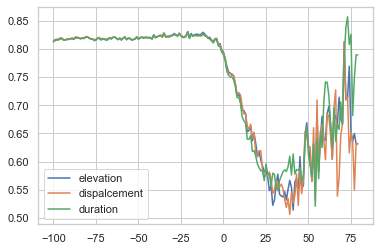

In [311]:
lines=score_reg3.plot.line()

In [312]:
bikes3['ele_diff'].describe()

count    52121.000000
mean        -2.614512
std         18.542110
min       -112.000000
25%        -11.000000
50%         -1.000000
75%          7.000000
max        112.000000
Name: ele_diff, dtype: float64

In [313]:
bikes3['rideable_type'].describe()

count            52121
unique               3
top       classic_bike
freq             42596
Name: rideable_type, dtype: object

In [314]:
bikes3['elevation_class']=pd.cut(bikes3.ele_diff,
                     bins=[-112, -9, 0, 5, 112],
                     labels=['-108 to -11', '-11 to 0','0 to 9', '9 to 107'])

<AxesSubplot:xlabel='elevation_class'>

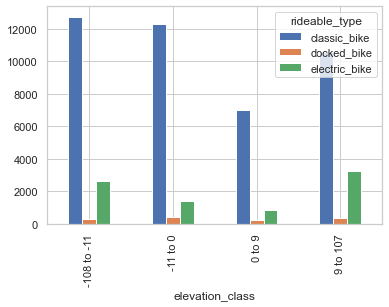

In [315]:
bikes3_class=bikes3.groupby(['elevation_class','rideable_type']).size().unstack(level=1)
bikes3_class.plot(kind='bar')

In [355]:
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,displacement,duration,velocity,ele_diff,type_num,elevation_class,gradient,city
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,...,-77.033354,casual,1181.668569,652.0,1.808648,-7.0,1,-11 to 0,-0.005924,DC
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,...,-77.053485,casual,650.588090,552.0,1.180945,-3.0,1,-11 to 0,-0.004611,DC
6,04BB3F5A7BA4B2FF,classic_bike,2021-02-01 22:07:12,2021-02-01 22:17:38,M St & New Jersey Ave SE,31208,1st & D St SE,31643,38.876300,-77.003700,...,-77.005965,member,974.678075,626.0,1.559861,9.0,1,9 to 107,0.009234,DC
7,C3411B13CD7E934A,classic_bike,2021-02-13 09:21:58,2021-02-13 09:35:24,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,...,-77.005483,member,2072.221473,806.0,2.570547,-14.0,1,-108 to -11,-0.006756,DC
8,53210C790B08B636,classic_bike,2021-02-06 09:26:38,2021-02-06 09:37:21,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,...,-77.005483,member,2072.221473,643.0,3.222179,-14.0,1,-108 to -11,-0.006756,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,...,-77.045000,member,3479.482161,1409.0,2.469750,2.0,1,0 to 9,0.000575,DC
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,...,-77.044961,member,5789.649872,1564.0,3.698374,-11.0,0,-108 to -11,-0.001900,DC
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,...,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0,0,-108 to -11,-0.001900,DC
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,...,-77.028694,member,1635.678457,889.0,1.839789,3.0,1,0 to 9,0.001834,DC


In [361]:
bikes3=bikes3[bikes3['rideable_type']!='docked_bike']

In [362]:
bikes3['rideable_type'].describe()

count            50741
unique               2
top       classic_bike
freq             42596
Name: rideable_type, dtype: object

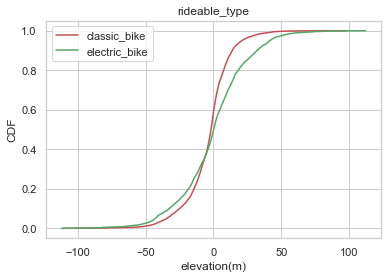

In [363]:
def decorate_cdf(title, x, y):
    """Labels the axes.

    title: string
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend(bikes3.groupby('rideable_type').groups.keys())
colors=['r', 'g']

i=0
for name, group in bikes3[bikes3['rideable_type']!='docked_bike'].groupby('rideable_type'):
    Cdf.from_seq(group.ele_diff).plot(color=colors[i])
    i=i+1

title, x, y = 'rideable_type','elevation(m)', 'CDF'
decorate_cdf(title,x,y)

In [316]:
bikes3['gradient']=bikes3['ele_diff']/bikes3['displacement']
bikes3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,ele_diff,type_num,elevation_class,gradient
0,0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,1181.668569,652.0,1.808648,-7.0,1,-11 to 0,-0.005924
1,27530B30645DEF27,classic_bike,2021-02-27 12:36:18,2021-02-27 12:45:30,21st St & Pennsylvania Ave NW,31252,25th St & Pennsylvania Ave NW,31237,38.901539,-77.046564,38.903827,-77.053485,casual,650.588090,552.0,1.180945,-3.0,1,-11 to 0,-0.004611
6,04BB3F5A7BA4B2FF,classic_bike,2021-02-01 22:07:12,2021-02-01 22:17:38,M St & New Jersey Ave SE,31208,1st & D St SE,31643,38.876300,-77.003700,38.884916,-77.005965,member,974.678075,626.0,1.559861,9.0,1,9 to 107,0.009234
7,C3411B13CD7E934A,classic_bike,2021-02-13 09:21:58,2021-02-13 09:35:24,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,38.905697,-77.005483,member,2072.221473,806.0,2.570547,-14.0,1,-108 to -11,-0.006756
8,53210C790B08B636,classic_bike,2021-02-06 09:26:38,2021-02-06 09:37:21,11th & S St NW,31280,1st & M St NE,31603,38.913761,-77.027025,38.905697,-77.005483,member,2072.221473,643.0,3.222179,-14.0,1,-108 to -11,-0.006756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61946,009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,3479.482161,1409.0,2.469750,2.0,1,0 to 9,0.000575
61947,7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,5789.649872,1564.0,3.698374,-11.0,0,-108 to -11,-0.001900
61948,D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,5789.649872,1539.0,3.762520,-11.0,0,-108 to -11,-0.001900
61949,D72FC8BD078FDE51,classic_bike,2021-02-04 14:42:32,2021-02-04 14:57:21,4th & M St SW,31108,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,38.876697,-77.017898,38.888774,-77.028694,member,1635.678457,889.0,1.839789,3.0,1,0 to 9,0.001834


In [317]:
bikes['gradient']=bikes['ele_diff']/bikes['displacement']

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,displacement,duration,velocity,start_hour,end_hour,ele_diff,type_num,elevation_class,gradient
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,...,member,1180.489725,400.0,2951.224312,19,19,7.0,1,-1 to 9,0.005930
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,...,member,3037.043165,1522.0,1995.429149,10,11,8.0,1,-1 to 9,0.002634
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,...,member,739.637513,418.0,1769.467733,13,13,6.0,0,-1 to 9,0.008112
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,...,member,1273.814978,1513.0,841.913402,18,18,8.0,0,-1 to 9,0.006280
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,...,member,958.777855,337.0,2845.038145,13,13,2.0,1,-1 to 9,0.002086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,member,3496.379367,1209.0,2891.959774,6,6,-71.0,1,-108 to -13,-0.020307
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,member,3496.379367,923.0,3788.059986,6,6,-71.0,1,-108 to -13,-0.020307
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,member,3496.379367,974.0,3589.711876,6,6,-71.0,1,-108 to -13,-0.020307
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,...,member,3496.379367,1055.0,3314.103665,6,6,-71.0,1,-108 to -13,-0.020307


In [319]:
bikes['city']='SF'
bikes3['city']='DC'

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [320]:
bikes_c_SF=bikes[bikes['rideable_type']=='classic_bike']
bikes_c_DC=bikes3[bikes3['rideable_type']=='classic_bike']

In [321]:
bikes_c_SF=bikes_c_SF[['displacement','city','gradient','ele_diff','duration']]
bikes_c_DC=bikes_c_DC[['displacement','city','gradient','ele_diff','duration']]

In [322]:
bikes_c_SF

,displacement,city,gradient,ele_diff,duration
0,1180.489725,SF,0.005930,7.0,400.0
1,3037.043165,SF,0.002634,8.0,1522.0
4,958.777855,SF,0.002086,2.0,337.0
10,1768.037606,SF,-0.005656,-10.0,682.0
11,508.686871,SF,0.000000,0.0,567.0
...,...,...,...,...,...
60273,3496.379367,SF,-0.020307,-71.0,969.0
60274,3496.379367,SF,-0.020307,-71.0,1209.0
60275,3496.379367,SF,-0.020307,-71.0,923.0
60276,3496.379367,SF,-0.020307,-71.0,974.0


In [323]:
bikes_c_feb=pd.concat((bikes_c_SF,bikes_c_DC),axis=0)
bikes_c_feb

,displacement,city,gradient,ele_diff,duration
0,1180.489725,SF,0.005930,7.0,400.0
1,3037.043165,SF,0.002634,8.0,1522.0
4,958.777855,SF,0.002086,2.0,337.0
10,1768.037606,SF,-0.005656,-10.0,682.0
11,508.686871,SF,0.000000,0.0,567.0
...,...,...,...,...,...
61942,2177.796344,DC,0.002296,5.0,760.0
61943,2634.045573,DC,-0.006074,-16.0,795.0
61944,2339.763069,DC,0.000855,2.0,743.0
61946,3479.482161,DC,0.000575,2.0,1409.0


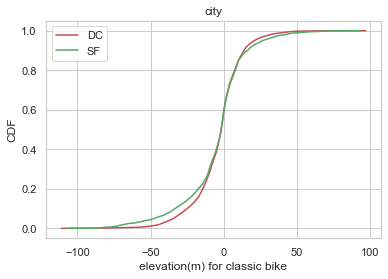

In [364]:
def decorate_cdf(title, x, y):
    """Labels the axes.

    title: string
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend(bikes_c_feb.groupby('city').groups.keys())
colors=['r', 'g']
i=0
for name, group in bikes_c_feb.groupby('city'):
    Cdf.from_seq(group.ele_diff).plot(color=colors[i])
    i=i+1

title, x, y = 'city','elevation(m) for classic bike', 'CDF'
decorate_cdf(title,x,y)


In [367]:
bikes_e_SF=bikes[bikes['rideable_type']=='electric_bike']
bikes_e_DC=bikes3[bikes3['rideable_type']=='electric_bike']

In [368]:
bikes_e_SF=bikes_e_SF[['displacement','city','gradient','ele_diff','duration']]
bikes_e_DC=bikes_e_DC[['displacement','city','gradient','ele_diff','duration']]

In [369]:
bikes_e_feb=pd.concat((bikes_e_SF,bikes_e_DC),axis=0)
bikes_e_feb

,displacement,city,gradient,ele_diff,duration
2,739.637513,SF,0.008112,6.0,418.0
3,1273.814978,SF,0.006280,8.0,1513.0
5,3843.682289,SF,-0.020553,-79.0,1518.0
6,3025.822803,SF,-0.018177,-55.0,858.0
7,1801.904236,SF,0.012764,23.0,345.0
...,...,...,...,...,...
61941,2177.796344,DC,0.002296,5.0,486.0
61945,3202.993231,DC,0.003122,10.0,657.0
61947,5789.649872,DC,-0.001900,-11.0,1564.0
61948,5789.649872,DC,-0.001900,-11.0,1539.0


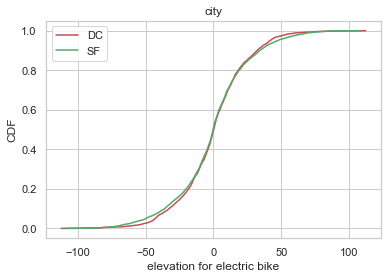

In [370]:
def decorate_cdf(title, x, y):
    """Labels the axes.

    title: string
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend(bikes_e_feb.groupby('city').groups.keys())
colors=['r', 'g']
i=0
for name, group in bikes_e_feb.groupby('city'):
    Cdf.from_seq(group.ele_diff).plot(color=colors[i])
    i=i+1

title, x, y = 'city','elevation for electric bike', 'CDF'
decorate_cdf(title,x,y)

In [332]:
bikes['gradient'].describe()

count    53289.000000
mean        -0.000892
std          0.013225
min         -0.094680
25%         -0.007981
50%          0.000000
75%          0.006228
max          0.094680
Name: gradient, dtype: float64

In [340]:
l=np.linspace(-0.1,0.9,50)
l

array([-0.1       , -0.07959184, -0.05918367, -0.03877551, -0.01836735,
        0.00204082,  0.02244898,  0.04285714,  0.06326531,  0.08367347,
        0.10408163,  0.1244898 ,  0.14489796,  0.16530612,  0.18571429,
        0.20612245,  0.22653061,  0.24693878,  0.26734694,  0.2877551 ,
        0.30816327,  0.32857143,  0.34897959,  0.36938776,  0.38979592,
        0.41020408,  0.43061224,  0.45102041,  0.47142857,  0.49183673,
        0.5122449 ,  0.53265306,  0.55306122,  0.57346939,  0.59387755,
        0.61428571,  0.63469388,  0.65510204,  0.6755102 ,  0.69591837,
        0.71632653,  0.73673469,  0.75714286,  0.77755102,  0.79795918,
        0.81836735,  0.83877551,  0.85918367,  0.87959184,  0.9       ])

In [341]:
score_reg_grad=pd.DataFrame(columns=score_reg.columns,index=l)
score_reg_grad

,elevation,dispalcement,duration
-0.100000,NaN,NaN,NaN
-0.079592,NaN,NaN,NaN
-0.059184,NaN,NaN,NaN
-0.038776,NaN,NaN,NaN
-0.018367,NaN,NaN,NaN
0.002041,NaN,NaN,NaN
0.022449,NaN,NaN,NaN
0.042857,NaN,NaN,NaN
0.063265,NaN,NaN,NaN
0.083673,NaN,NaN,NaN


In [342]:
for i in l:
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['ele_diff'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg_grad.loc[i]['elevation']=score
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['displacement'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg_grad.loc[i]['dispalcement']=score
    X=pd.DataFrame(bikes[bikes['ele_diff']>i]['duration'])
    Y=pd.DataFrame(bikes[bikes['ele_diff']>i]['type_num'])
    X_scale = (X-X.mean())/X.std()
    lr = LogisticRegression(fit_intercept=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42)
    lr.fit(X_train,Y_train)
    score = lr.score(X_test, Y_test)
    score_reg_grad.loc[i]['duration']=score

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


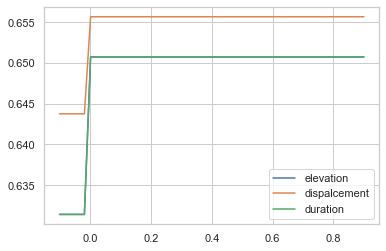

In [343]:
lines=score_reg_grad.plot.line()